In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pims

from scipy.ndimage import gaussian_filter


In [49]:
import numpy as np
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
#movie = 'Control'
movie = '130721'
#movie ='140721'
#movie ='150721'
#movie ='100621'
MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'


In [38]:
datapath = '/mnt/d/Gel_Sheet_Data/sample/T37'
imseq =pims.ImageSequence(datapath+'/*.tif')

In [62]:
imseq  = np.load(MOVIE_PATH + 'np/gel_norm.npy')[10]


In [63]:
np.array(imseq[10]).shape

(512, 512)

In [64]:
im = imseq[0]
print (im.shape)
imsz = im.shape
im_stack = np.zeros(imsz +(len(imseq),))

for i in range(len(imseq)):
    im_stack[:,:,i] = imseq[i]
print(im_stack.shape)

(512, 512)
(512, 512, 160)


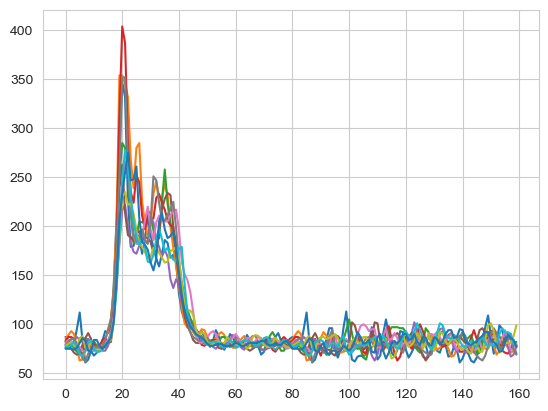

In [65]:
plt.figure()
for i  in range(0,im_stack.shape[1],50):
    plt.plot(im_stack[100,i,:])

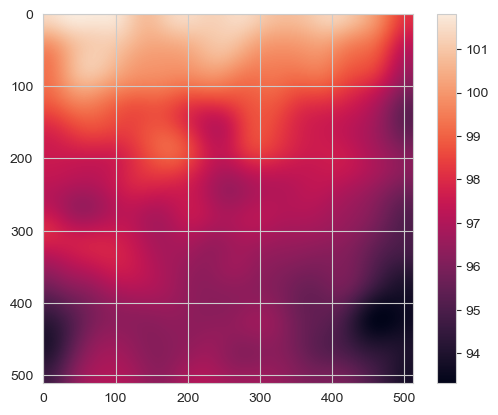

In [66]:
bg = gaussian_filter(np.mean(im_stack[:,:,:],axis = 2),25)
plt.imshow(bg); plt.colorbar()

In [67]:
imstack_bg = np.zeros(im_stack.shape)
for i in range(len(imseq)):
    imstack_bg[:,:,i] = gaussian_filter(im_stack[:,:,i],2)/bg

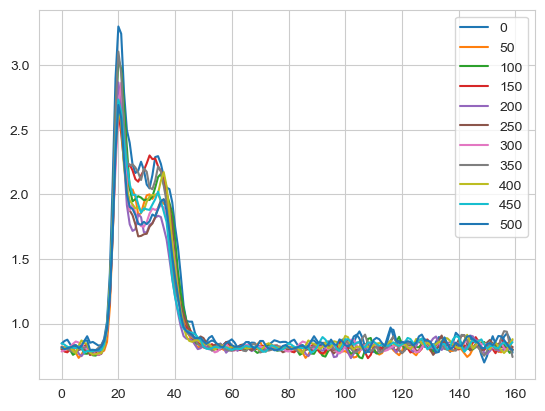

In [68]:
plt.figure()
for i  in range(0,imstack_bg.shape[1],50):
    plt.plot(imstack_bg[i,100,:], label = str(i))
plt.legend()

#plt.ylim([0.8,1.2])

In [69]:
h = np.zeros(im.shape)
for i in range(h.shape[0]):
    for j in range(h.shape[1]):
        try:
            h[i,j] = np.where(imstack_bg[i,j,:]>1.1)[0][-1]
        except:
            h[i,j] = np.nan

In [70]:
h

array([[ 42.,  43.,  43., ...,  44.,  44.,  44.],
       [ 43.,  43.,  43., ...,  44.,  43.,  43.],
       [ 43.,  43.,  43., ...,  43.,  43.,  43.],
       ...,
       [ 44.,  44.,  44., ...,  44.,  44.,  44.],
       [ 43.,  44.,  44., ...,  44.,  44.,  44.],
       [ 43.,  43.,  43., ...,  44.,  44., 143.]])

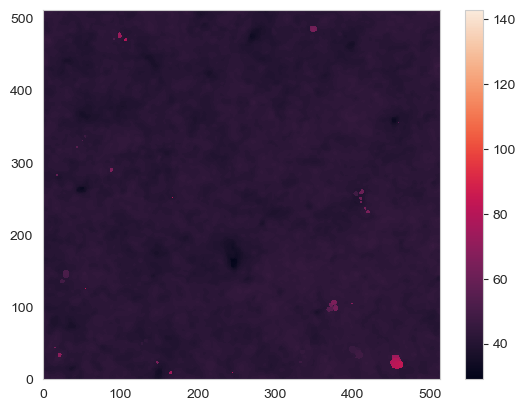

In [71]:
plt.pcolormesh(h)#,vmin =20,vmax=80);
plt.colorbar()


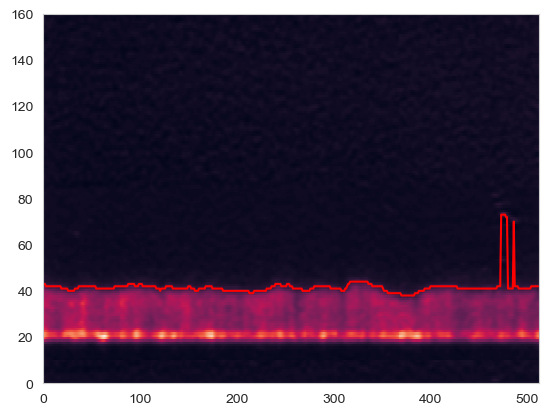

In [72]:
plt.pcolormesh(np.transpose(imstack_bg[:,100,:]));plt.plot(h[:,100],'r')
#plt.xlim([150,200])
#plt.clim([0.9,1.1])